# Feature Engineering - Lab 01 - Report

Data preprocessing is a crucial step in the data analysis pipeline that involves transforming raw data into a clean and structured format suitable for further analysis and modeling. This preparatory phase plays a fundamental role in enhancing the quality of data by addressing various issues such as missing values, outliers, and inconsistencies. By performing data preprocessing techniques, such as data cleaning, feature scaling, feature engineering, and handling categorical variables, analysts can ensure that the data is accurate, complete, and ready for use in analytical models. Effective data preprocessing lays the foundation for meaningful insights and reliable predictions, contributing significantly to the success of data-driven decision-making processes. 

In this lab, we use following data preprocessing techniques to prepare the data for analysis and modeling tasks.

- Data cleaning
- Handling missing values
- Imputing values for outliers
- Feature encoding
- Handling categorical variables
- Dimensionality reduction
- Feature selection

In [80]:
import pandas as pd

# Load the CSV file containing the data set
df_train = pd.read_csv('train.csv')
print(f"Shape of the train data set: {df_train.shape}")

df_valid = pd.read_csv('valid.csv')
print(f"Shape of the validation data set: {df_valid.shape}")

df_test = pd.read_csv('X_test.csv')
print(f"Shape of the test data set: {df_test.shape}")

df_train.head()

Shape of the train data set: (517788, 145)
Shape of the validation data set: (172596, 145)
Shape of the test data set: (172596, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status
0,NaN,NaN,14000,14000,14000.0,36 months,7.35,434.53,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,2000,2000,2000.0,36 months,16.29,70.61,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,5000,5000,4750.0,36 months,7.39,155.28,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,20600,20600,20600.0,36 months,11.99,684.12,B,B5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,10000,10000,10000.0,36 months,7.39,310.56,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


In [81]:
# Get a copy of the data set for feature engineering process
df_temp = df_train.copy()

# Divide the data set into features and target
X_temp = df_temp.drop('loan_status', axis=1)
y_temp = df_temp['loan_status']

### 1. Data Cleaning

Data cleaning is an essential component of the data preprocessing pipeline that focuses on identifying and rectifying errors, inconsistencies, and inaccuracies within the dataset. It involves a series of steps aimed at ensuring the quality and integrity of the data by addressing issues such as missing values, duplicate entries, outliers, and noise. Through meticulous data cleaning techniques, analysts aim to improve the reliability and accuracy of the dataset, thus enhancing the effectiveness of subsequent analysis and modeling tasks. By detecting and rectifying errors early in the data processing workflow, data cleaning helps mitigate the risk of biased insights and erroneous conclusions, ultimately leading to more robust and reliable decision-making based on the data. In this lab, we delve into various data cleaning techniques and strategies to effectively prepare the data for further analysis and modeling endeavors.

As a first step in data cleaning, we remove columns with many missing values, using a threshold of 50%. This helps us focus on variables with enough information and ensures our analysis is based on reliable data. By removing columns with a high percentage of missing values, we improve the quality of our dataset for further analysis and modeling.

In [82]:
null_counts = X_temp.isnull().sum()
print(null_counts)

id                       517788
member_id                517788
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_status        498528
settlement_date          498528
settlement_amount        498528
settlement_percentage    498528
settlement_term          498528
Length: 144, dtype: int64


In [83]:
# Remove columns with more than 50% missing values
threshold = 0.5
columns_to_drop = X_temp.columns[X_temp.isnull().mean() > threshold].tolist()

X_temp.drop(columns_to_drop, axis=1, inplace=True)

print(X_temp.shape)

X_temp.head()

(517788, 86)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N,Cash,N
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,NaN,NaN,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,N,Cash,N
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N,Cash,N
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,NaN,NaN,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,N,Cash,N
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N,Cash,N


After removing columns with many missing values, the next step in data cleaning involves imputing missing values with new values. For categorical columns, we replace missing values with the mode (most frequent value), while for numerical columns, we use the mean value. This process ensures that the dataset is complete and ready for analysis, while maintaining the integrity of the data. Imputing missing values with appropriate replacements helps preserve the overall structure and distribution of the dataset, enabling accurate analysis and modeling.

In [84]:
# Imput missing values in the columns
for col in X_temp.columns:
    if X_temp[col].dtype == 'object':
        mode_value = X_temp[col].mode()[0]
        X_temp[col] = X_temp[col].fillna(mode_value)
    else:
        mean_value = X_temp[col].mean()
        X_temp[col] = X_temp[col].fillna(mean_value)

print(X_temp.shape)
X_temp.head()

(517788, 86)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N,Cash,N
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,Teacher,10+ years,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,N,Cash,N
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N,Cash,N
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,Teacher,10+ years,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,N,Cash,N
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N,Cash,N


After imputing missing values, the next step in data cleaning involves handling outliers. Outliers are data points that significantly deviate from the rest of the dataset and can skew analysis results. To address outliers, we identify them using a method that compares each value to the median of the column.

- If the absolute difference between a value and the median is greater than 5 times the standard deviation, the value is considered an outlier.

Once identified, outliers are imputed with the median value of the column. This process ensures that extreme values do not unduly influence analysis outcomes, leading to more robust and reliable results. By handling outliers effectively, we ensure that our dataset is better suited for subsequent analysis and modeling tasks.

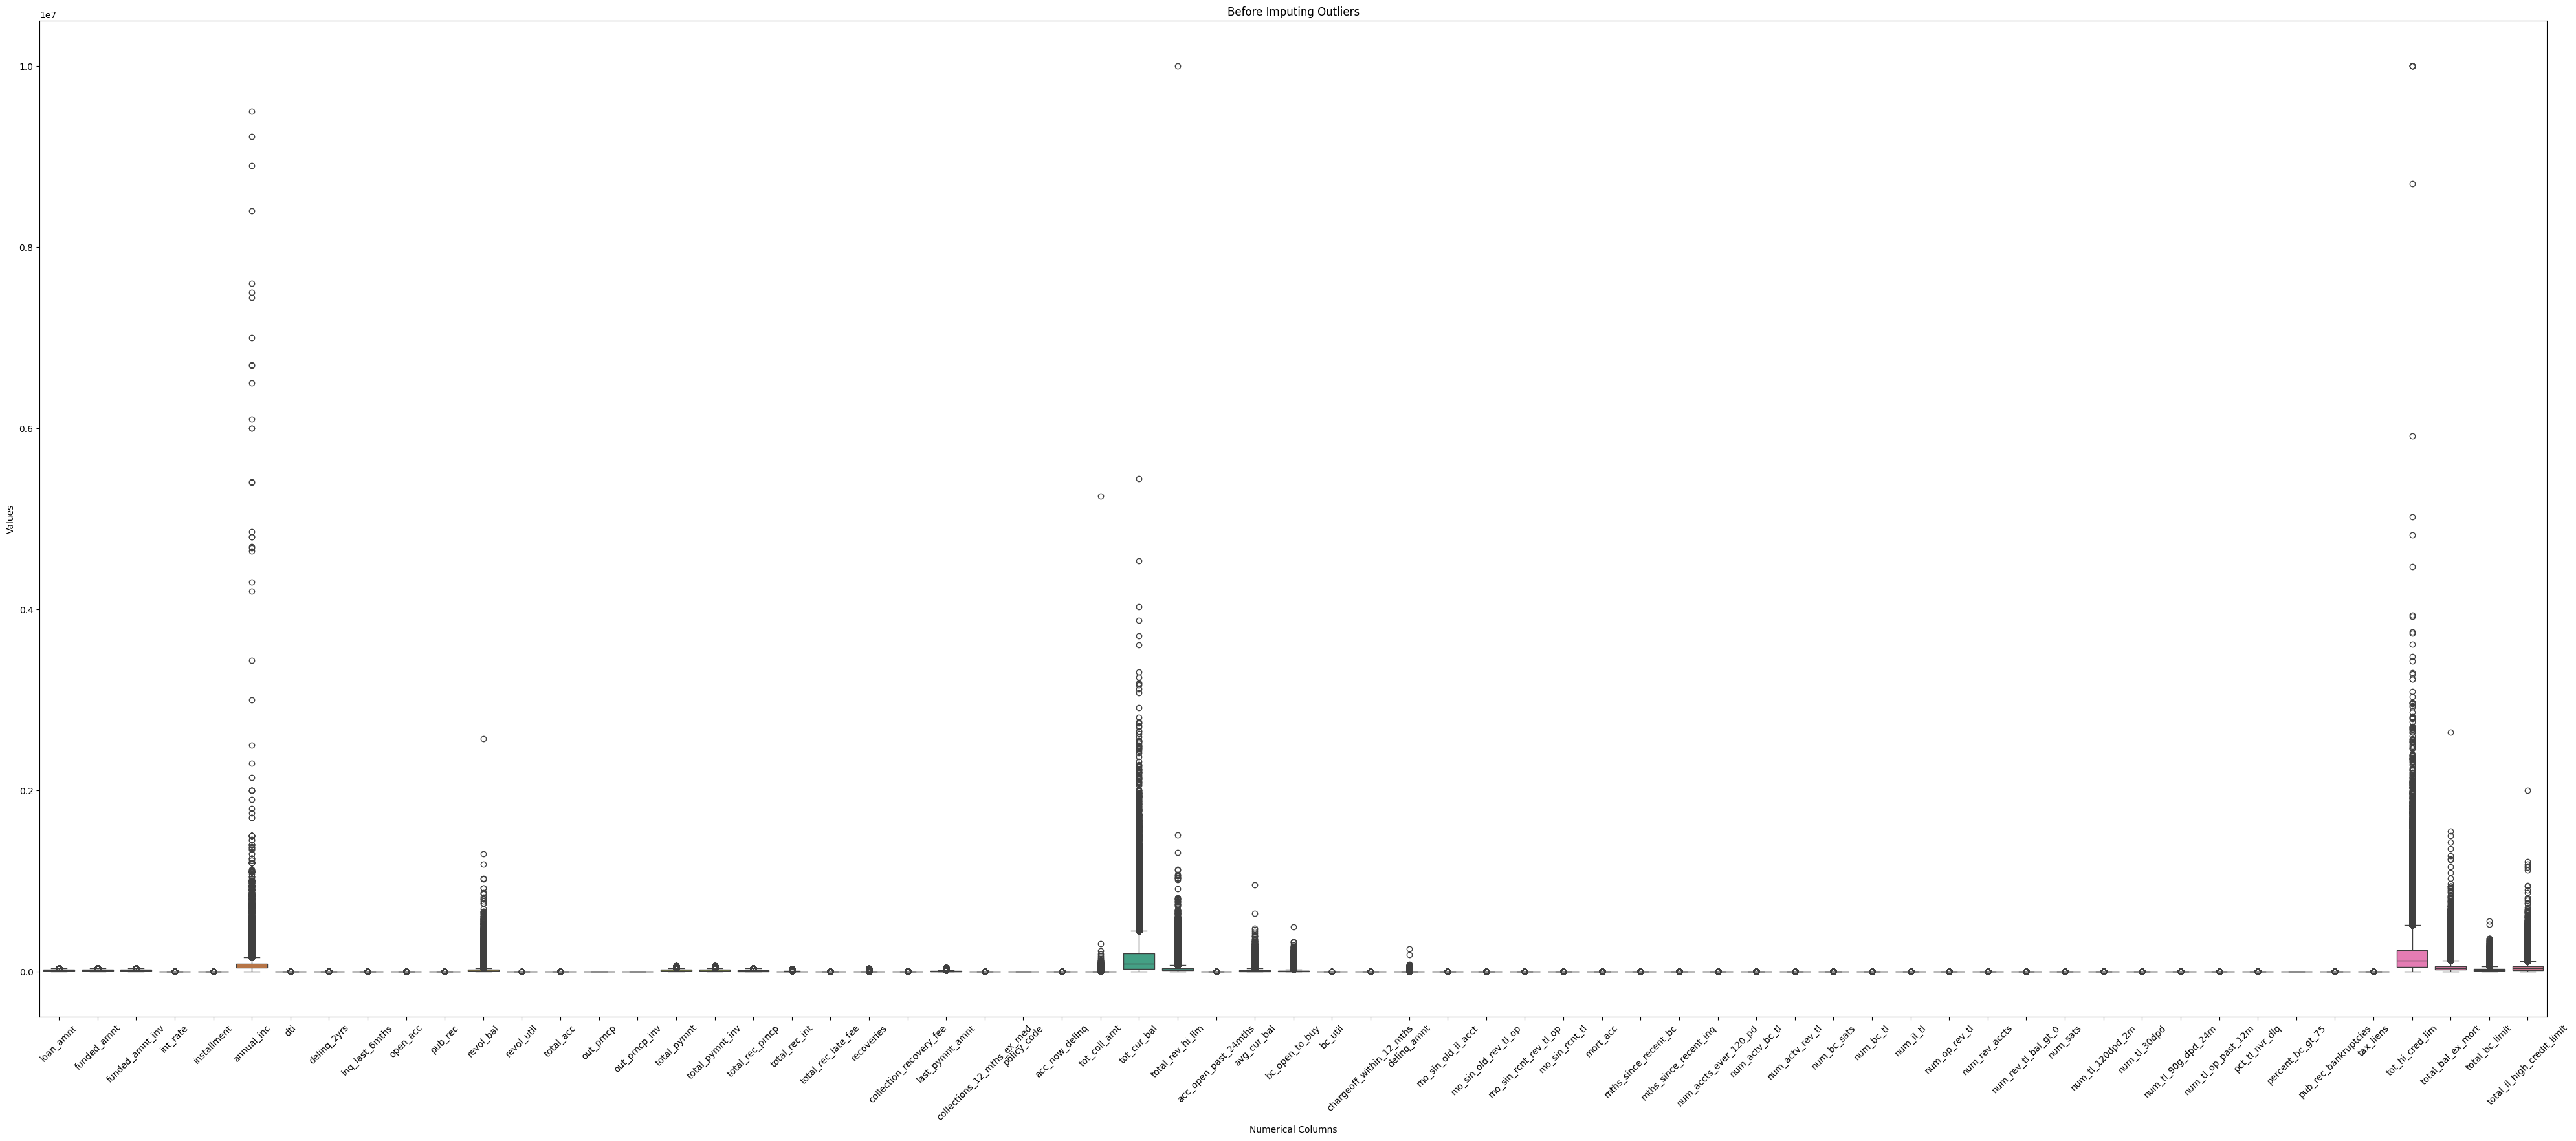

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the numerical columns
numerical_columns = X_temp.select_dtypes(include=np.number).columns

# Create box plots before imputing outliers
plt.figure(figsize=(50, 20))
sns.boxplot(data=X_temp[numerical_columns])
plt.title('Before Imputing Outliers')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [85]:
# Define a function to replace outliers with the median
def replace_outliers(series):
    series_temp = series.copy()  # Create a copy of the input series
    median = series_temp.median()
    std_deviation = series_temp.std()
    outliers = (series_temp - median).abs() > 5 * std_deviation  # Adjust the threshold as needed
    series_temp[outliers] = median
    return series_temp

# Impute outliers in numerical columns
for col in numerical_columns:
    X_temp[col] = replace_outliers(X_temp[col])

print(X_temp.shape)
X_temp.head()

(517788, 86)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N,Cash,N
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,Teacher,10+ years,...,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,N,Cash,N
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N,Cash,N
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,Teacher,10+ years,...,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,N,Cash,N
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N,Cash,N


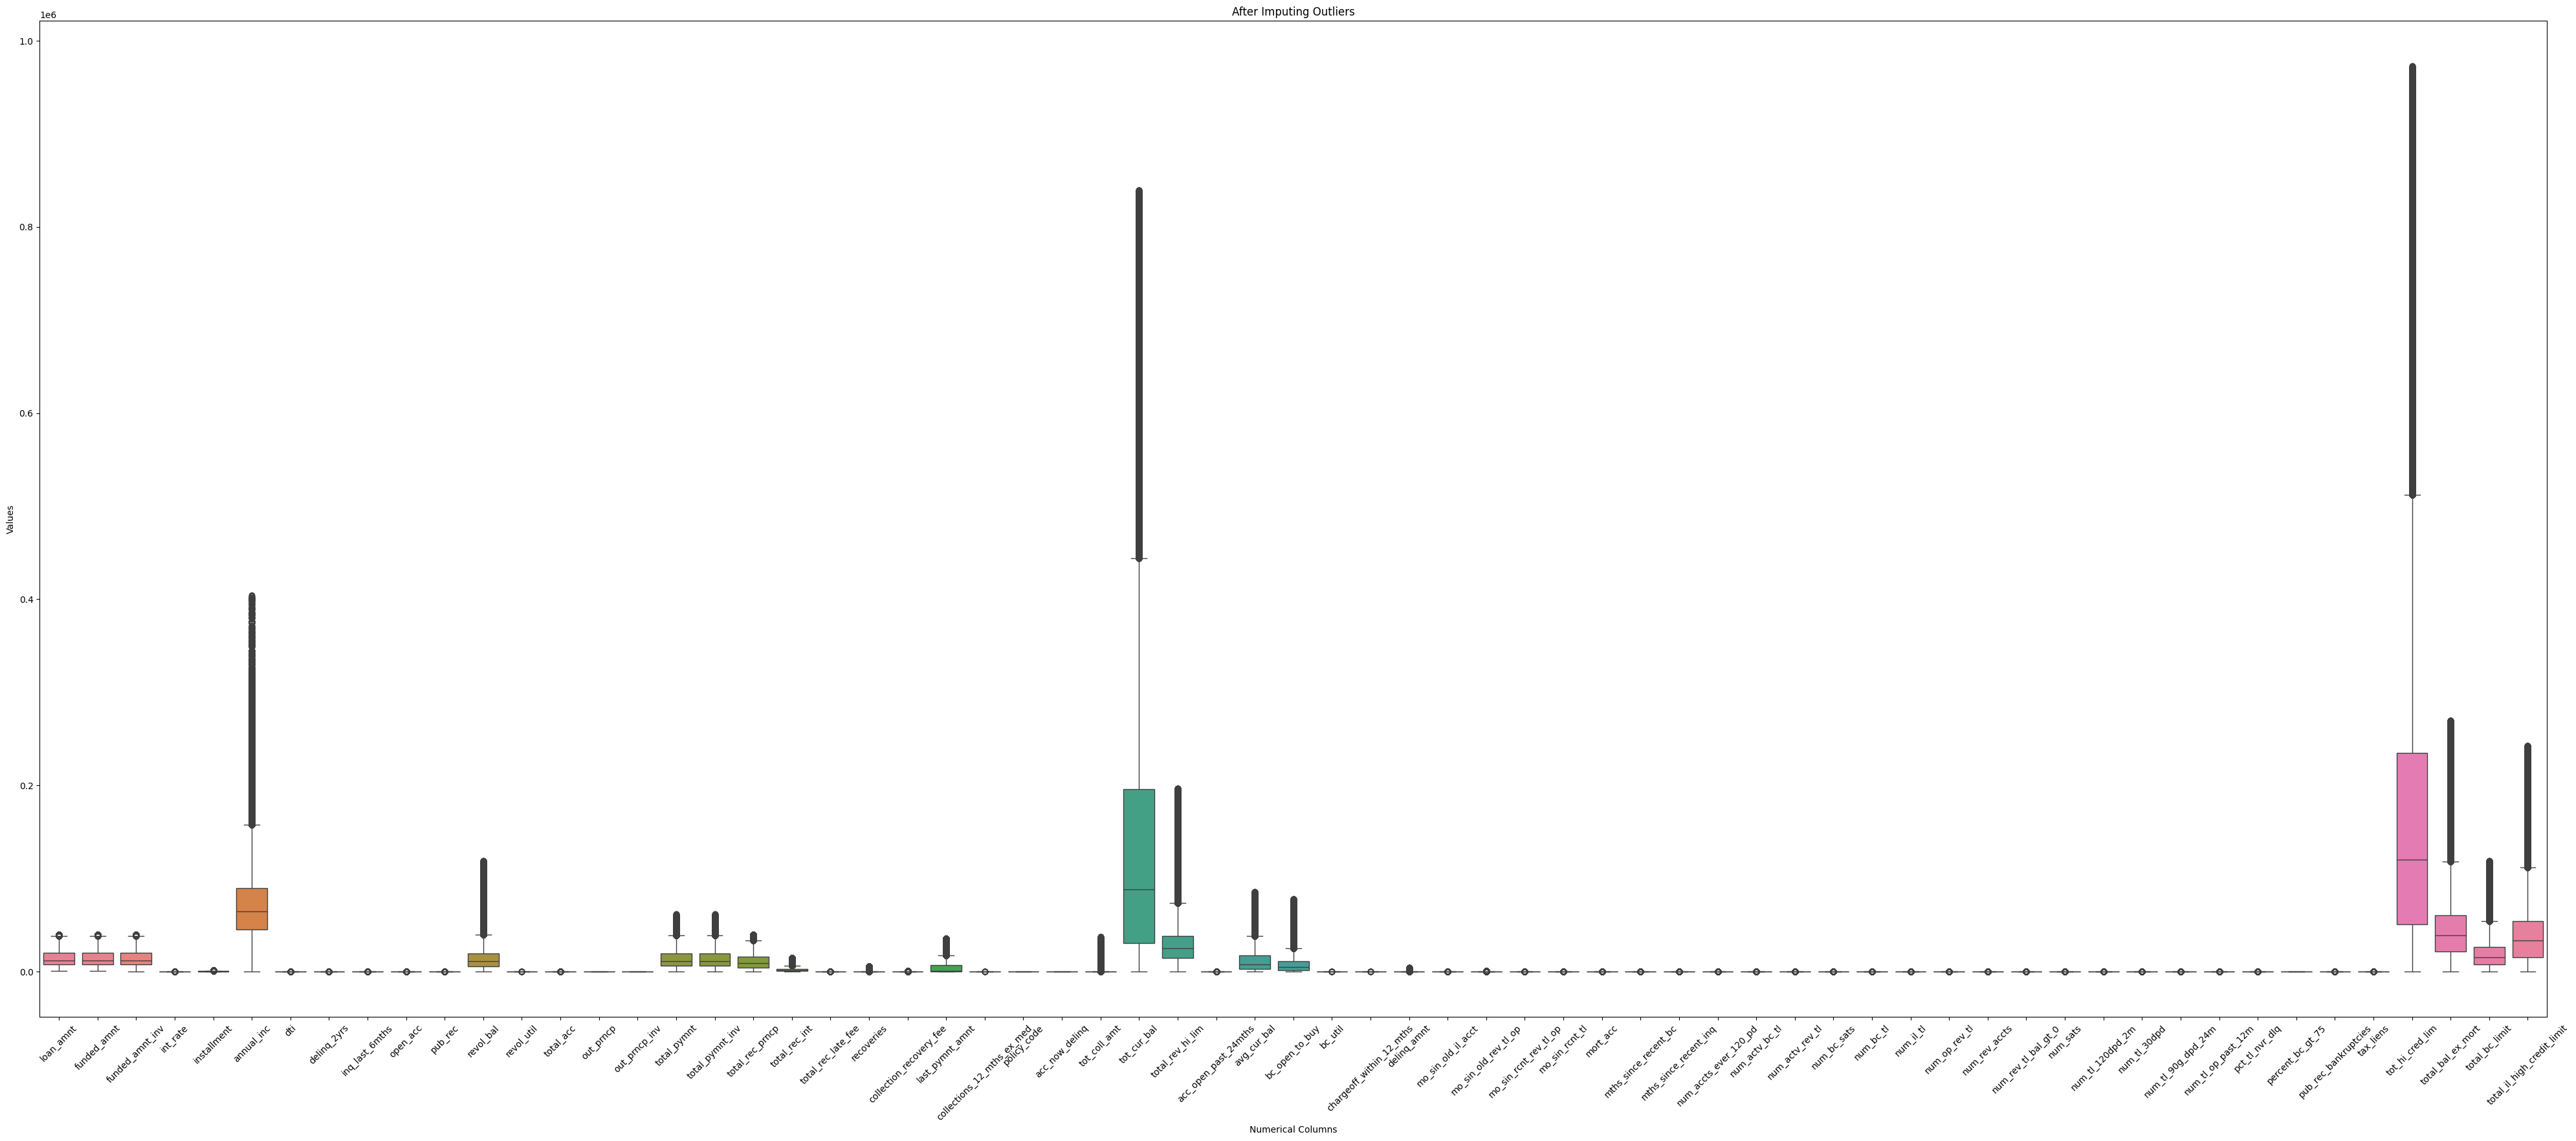

In [12]:
# Create box plots after imputing outliers
plt.figure(figsize=(50, 20))
sns.boxplot(data=X_temp[numerical_columns])
plt.title('After Imputing Outliers')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

After handling outliers, the next step in data cleaning involves removing columns with constant values throughout. These columns, also known as constant features, do not provide any meaningful information for analysis or modeling as they contain the same value for all records. By removing such columns, we streamline the dataset and focus our analysis on variables that exhibit variability and contribute to the predictive power of the model. This process helps improve the efficiency of subsequent analysis and modeling tasks by reducing the dimensionality of the dataset and eliminating redundant information. Additionally, removing constant features helps prevent potential issues such as overfitting, where the model learns noise rather than meaningful patterns in the data.

In [86]:
# Get the number of unique values in each column
unique_counts = X_temp.nunique()

# Filter columns with only one unique value
constant_columns = unique_counts[unique_counts == 1].index.tolist()

X_temp.drop(constant_columns, axis=1, inplace=True)

print(X_temp.shape)
X_temp.head()

(517788, 80)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,Cash,N
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,Teacher,10+ years,...,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,Cash,N
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,Cash,N
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,Teacher,10+ years,...,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,Cash,N
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,Cash,N


### 2. Feature Encoding

Feature encoding is a crucial technique in data preprocessing that involves converting categorical variables into a numerical format suitable for machine learning algorithms. Categorical variables represent qualitative data, such as gender or color, which cannot be directly used in most machine learning models. Feature encoding enables us to transform these categorical variables into numerical representations that algorithms can understand and process. This process is essential for effectively leveraging categorical data in machine learning models, ensuring that they can learn from all relevant information in the dataset. Feature encoding techniques include one-hot encoding, label encoding, and ordinal encoding, each suited for different types of categorical variables and modeling scenarios. By applying feature encoding, we enable machine learning models to effectively incorporate categorical variables into their decision-making processes, ultimately improving their predictive performance and accuracy.

In [87]:
categorical_cols = X_temp.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [88]:
# Extract numerical part from 'zip_code' and convert to integers
X_temp['zip_code'] = X_temp['zip_code'].str.extract(r'(\d+)').astype(int)

Ordinal mapping is a feature encoding technique used for columns with a small number of unique values. It assigns integer values to each unique value based on their order or significance, preserving the ordinal relationship between the categories. This technique is useful for representing ordinal categorical variables with a natural order or hierarchy, such as education level or customer satisfaction ratings. By converting categorical variables into numerical representations using ordinal mapping, machine learning models can better understand the relative importance or magnitude of different categories, improving their predictive performance.

In [89]:
ordinal_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Encode ordinal categorical values using the mapping dictionary
X_temp['emp_length'] = X_temp['emp_length'].map(ordinal_mapping)

In [90]:
print(f"No. of unique values before get to the lower case: {X_temp['emp_title'].nunique()}")

# Convert values of 'emp_title' column to lowercase
X_temp['emp_title'] = X_temp['emp_title'].str.lower()

print(f"No. of unique values after got to the lower case: {X_temp['emp_title'].nunique()}")

No. of unique values before get to the lower case: 175168
No. of unique values after got to the lower case: 152585


In [91]:
unique_value_counts = X_temp.select_dtypes(include=['object']).nunique()
unique_value_counts.columns = ['Column', 'Unique Values']

print(unique_value_counts)

term                         2
grade                        7
sub_grade                   35
emp_title               152585
home_ownership               6
verification_status          3
issue_d                    138
purpose                     14
title                    27117
addr_state                  51
earliest_cr_line           709
initial_list_status          2
last_pymnt_d               133
last_credit_pull_d         132
application_type             2
disbursement_method          2
debt_settlement_flag         2
dtype: int64


In [94]:
# Classification of categorical columns into ordinal and nominal
ordinal_cols = pd.Index(['term', 'grade', 'sub_grade', 'verification_status', 'initial_list_status', 'application_type', 'disbursement_method', 'debt_settlement_flag'])
nominal_cols = pd.Index(['home_ownership', 'purpose', 'addr_state'])

# Columns with date type values
date_cols = pd.Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'])

# Columns with many unique values
many_unique_cols = pd.Index(['emp_title', 'title'])

I used the scikit-learn OrdinalEncoder to transform ordinal categorical variables into numerical representations. This allowed me to maintain the ordinal relationship between the categories while preparing the data for machine learning models. The OrdinalEncoder assigned unique integer values to each category, preserving their order or hierarchy. By incorporating this feature encoding technique into my data preprocessing workflow, I was able to enhance the predictive accuracy of my machine learning models by effectively leveraging the ordinal nature of the data.

In [95]:
# Perform ordinal encoding on ordinal columns
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

X_temp[ordinal_cols] = ordinal_encoder.fit_transform(X_temp[ordinal_cols])

# Convert encoded values to integers
X_temp[ordinal_cols] = X_temp[ordinal_cols].astype(int)

print(X_temp.shape)
X_temp.head()

(517788, 80)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,0,7.35,434.53,0,3,paralegal,1,...,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,0,0
1,2000,2000,2000.0,0,16.29,70.61,3,16,teacher,10,...,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,0,0
2,5000,5000,4750.0,0,7.39,155.28,0,3,owner,4,...,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,0,0
3,20600,20600,20600.0,0,11.99,684.12,1,9,teacher,10,...,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,0,0
4,10000,10000,10000.0,0,7.39,310.56,0,3,senior ux designer,0,...,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,0,0


I used the scikit-learn LabelEncoder to convert categorical nominal variables into numerical representations. This encoder assigned a unique integer value to each category, providing a numerical label for each distinct value in the column. By using the LabelEncoder, I transformed categorical nominal variables into a format that machine learning models could interpret and process effectively. This preprocessing step enabled me to incorporate categorical nominal data into my machine learning models, improving their predictive performance by converting qualitative data into a numerical format.

In [96]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in nominal_cols:
    X_temp[col] = label_encoder.fit_transform(X_temp[col])

print(X_temp.shape)
X_temp.head()

(517788, 80)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,0,7.35,434.53,0,3,paralegal,1,...,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,0,0
1,2000,2000,2000.0,0,16.29,70.61,3,16,teacher,10,...,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,0,0
2,5000,5000,4750.0,0,7.39,155.28,0,3,owner,4,...,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,0,0
3,20600,20600,20600.0,0,11.99,684.12,1,9,teacher,10,...,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,0,0
4,10000,10000,10000.0,0,7.39,310.56,0,3,senior ux designer,0,...,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,0,0


To encode columns with date values, I followed this strategy:

I first found the minimum date among all the values in the column. Then, I converted each date value to a numerical representation by calculating the number of days elapsed from the minimum date. This approach transformed date columns into a format that machine learning models could understand, allowing me to incorporate date information into my models for improved predictive performance.

In [97]:
print(X_temp[date_cols].head())

# Set initial minimum date
min_date = pd.to_datetime('2024-01-01')

for col in date_cols:
    X_temp[col] = pd.to_datetime(X_temp[col], format='%b-%Y')
    if X_temp[col].min() < min_date:
        min_date = X_temp[col].min()

print(f"\nmin_date: {min_date}\n")

# Set timestamps for date columns
for col in date_cols:
    X_temp[col] = (X_temp[col] - min_date).dt.days.astype(int)

print(X_temp[date_cols].head())

    issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
0  Aug-2017         Feb-2003     Dec-2018           Dec-2018
1  Jul-2014         Mar-1982     Jul-2017           Jul-2017
2  Mar-2016         Jul-1997     Oct-2017           Oct-2017
3  Jan-2015         Apr-1998     Jan-2018           Dec-2017
4  Mar-2016         Jan-2001     Dec-2017           Jul-2018

min_date: 1944-01-01 00:00:00

   issue_d  earliest_cr_line  last_pymnt_d  last_credit_pull_d
0    26876             21581         27363               27363
1    25749             13939         26845               26845
2    26358             19540         26937               26937
3    25933             19814         27029               26998
4    26358             20820         26998               27210


In [98]:
X_temp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,0,7.35,434.53,0,3,paralegal,1,...,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,0,0
1,2000,2000,2000.0,0,16.29,70.61,3,16,teacher,10,...,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,0,0
2,5000,5000,4750.0,0,7.39,155.28,0,3,owner,4,...,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,0,0
3,20600,20600,20600.0,0,11.99,684.12,1,9,teacher,10,...,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,0,0
4,10000,10000,10000.0,0,7.39,310.56,0,3,senior ux designer,0,...,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,0,0


I used the TargetEncoder from the categorical_encoders library to encode columns that have many unique values. Target encoding is a feature encoding technique that assigns each category in a categorical variable a numerical value based on the target variable's mean or other statistical measures. This encoding method is particularly useful for columns with a large number of unique categories, as it captures the relationship between the categorical variable and the target variable, potentially improving the predictive power of the model. By incorporating target encoding into my data preprocessing pipeline, I transformed categorical variables into numerical representations that could be effectively utilized by machine learning models for better predictive accuracy.

In [99]:
from category_encoders import TargetEncoder

print(X_temp[many_unique_cols].head())
print()

# Perform target encoding on 'emp_title' and 'title' columns
target_encoder = TargetEncoder()
X_temp[many_unique_cols] = target_encoder.fit_transform(X_temp[many_unique_cols], y_temp)

print(X_temp[many_unique_cols].head())

            emp_title                    title
0          paralegal        Debt consolidation
1             teacher       Debt consolidation
2               owner  Credit card refinancing
3             teacher       Debt consolidation
4  senior ux designer  Credit card refinancing

   emp_title     title
0   0.645924  0.669920
1   0.641054  0.669920
2   0.619686  0.729964
3   0.641054  0.669920
4   0.747733  0.729964


### 3. Feature Selection

Feature selection is a crucial aspect of the feature engineering process that involves identifying and selecting the most relevant and informative features from the dataset for use in machine learning models. The goal of feature selection is to improve model performance by reducing the dimensionality of the dataset and focusing on the most important features that contribute to predictive accuracy. This process helps mitigate the curse of dimensionality, reduce overfitting, and improve model interpretability by eliminating redundant or irrelevant features. Feature selection techniques include filter methods, wrapper methods, and embedded methods, each employing different strategies to identify and select the most relevant features based on criteria such as feature importance, correlation, or predictive power. By performing feature selection, data scientists and machine learning practitioners can streamline the modeling process, enhance model performance, and gain deeper insights into the underlying patterns within the data.

Mutual information is a statistical metric that measures the amount of information obtained about one variable through the knowledge of another variable. In the context of feature selection, mutual information quantifies the mutual dependence between each feature and the target variable. It assesses the degree of association or dependency between a feature and the target variable, irrespective of the linear relationship.

To select features using mutual information, I computed the mutual information score between each feature and the target variable. This score indicates how much information each feature provides about the target variable. Features with high mutual information scores are considered informative and are retained for further analysis, while features with low scores are deemed less relevant and are excluded from the analysis. By selecting features based on mutual information, I focused on identifying the most informative features that have a significant association with the target variable, thus improving the predictive performance of the machine learning model.

In [100]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information for each feature
mi_values = mutual_info_classif(X_temp, y_temp, discrete_features='auto', random_state=42)

# Create a DataFrame to store feature names and their corresponding MI values
mi_df = pd.DataFrame({'Feature': X_temp.columns, 'MI Value': mi_values})
mi_df = mi_df.sort_values(by='MI Value', ascending=False) # Descending order

print(mi_df)

                       Feature  MI Value
30             total_rec_prncp  0.595034
36             last_pymnt_amnt  0.385938
33                  recoveries  0.301792
34     collection_recovery_fee  0.282821
8                    emp_title  0.189670
..                         ...       ...
78         disbursement_method  0.000504
48                 delinq_amnt  0.000122
73                   tax_liens  0.000002
39            application_type  0.000000
38  collections_12_mths_ex_med  0.000000

[80 rows x 2 columns]


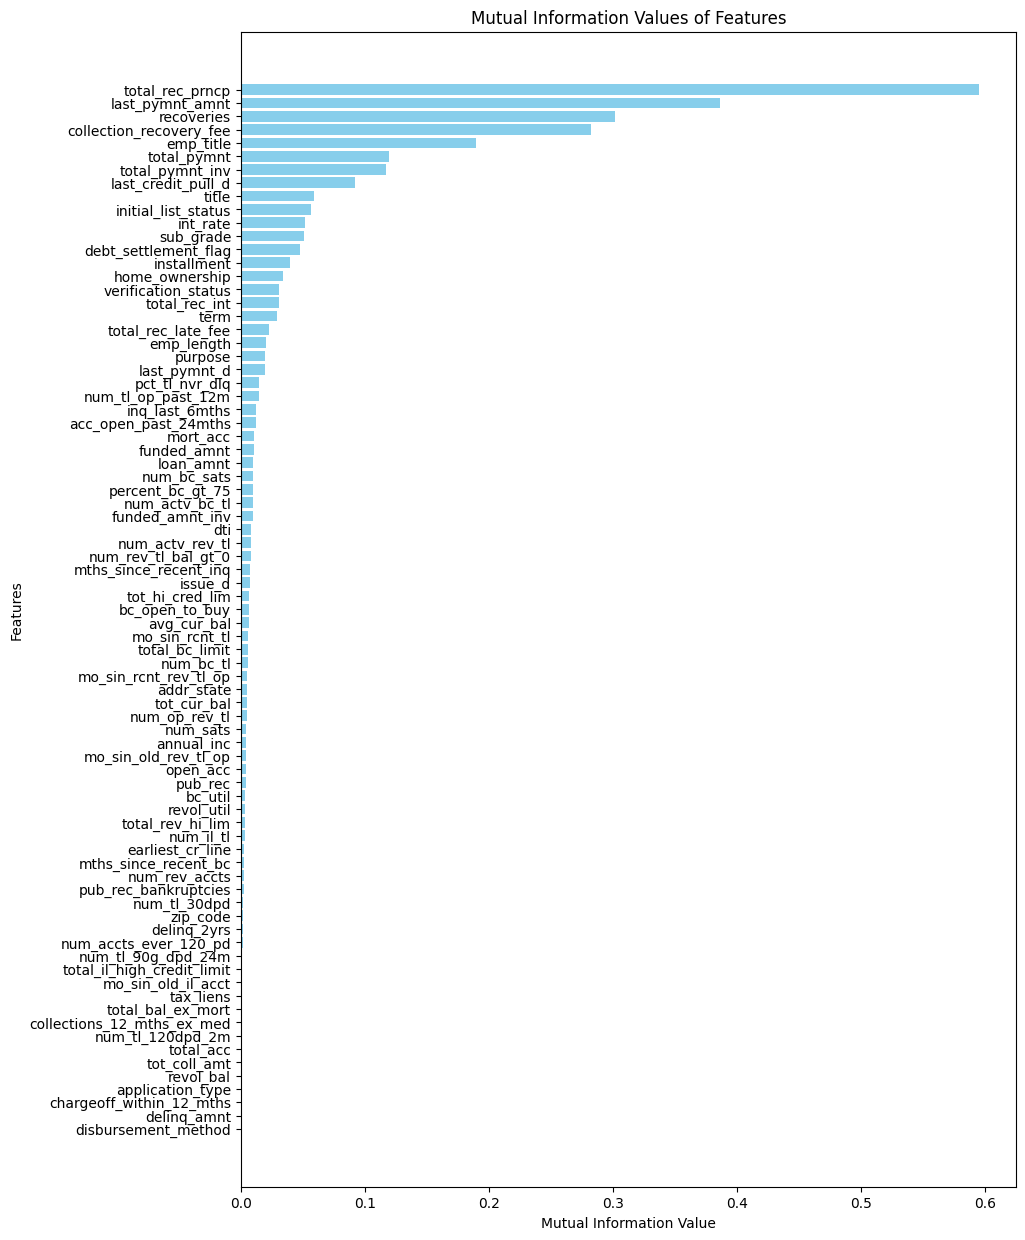

In [54]:
import matplotlib.pyplot as plt

# Plotting the graph
plt.figure(figsize=(10, 15))
plt.barh(mi_df['Feature'], mi_df['MI Value'], color='skyblue')
plt.xlabel('Mutual Information Value')
plt.ylabel('Features')
plt.title('Mutual Information Values of Features')
plt.gca().invert_yaxis()  # Invert y-axis to show feature with highest MI at the top
plt.show()

In [101]:
threshold_value = 0.01
selected_features = mi_df[mi_df['MI Value'] > threshold_value]['Feature'].tolist()

# Print the names of selected features
print("Selected Features with MI > 0.01:")
print(f"No. of selected features: {len(selected_features)}")
print(selected_features)

Selected Features with MI > 0.01:
No. of selected features: 29
['total_rec_prncp', 'last_pymnt_amnt', 'recoveries', 'collection_recovery_fee', 'emp_title', 'total_pymnt', 'total_pymnt_inv', 'last_credit_pull_d', 'grade', 'title', 'initial_list_status', 'int_rate', 'sub_grade', 'debt_settlement_flag', 'installment', 'home_ownership', 'verification_status', 'total_rec_int', 'term', 'total_rec_late_fee', 'emp_length', 'last_pymnt_d', 'purpose', 'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'inq_last_6mths', 'acc_open_past_24mths', 'mort_acc', 'loan_amnt']


After selecting features using mutual information, the next step involved calculating the correlation between features and removing features with high correlation. 

Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. High correlation between features indicates redundancy, as these features convey similar information to the model, potentially leading to multicollinearity issues.

To identify features with high correlation, I computed the correlation matrix between all pairs of selected features. Features with correlation coefficients above a certain threshold (e.g., 0.8 or -0.8) were considered highly correlated and were subsequently removed from the dataset.

By removing features with high correlation, I aimed to reduce redundancy in the dataset and improve the stability and interpretability of the machine learning model. This step helped prevent multicollinearity issues and ensured that the remaining features provided unique and complementary information to the model, ultimately enhancing its predictive performance.

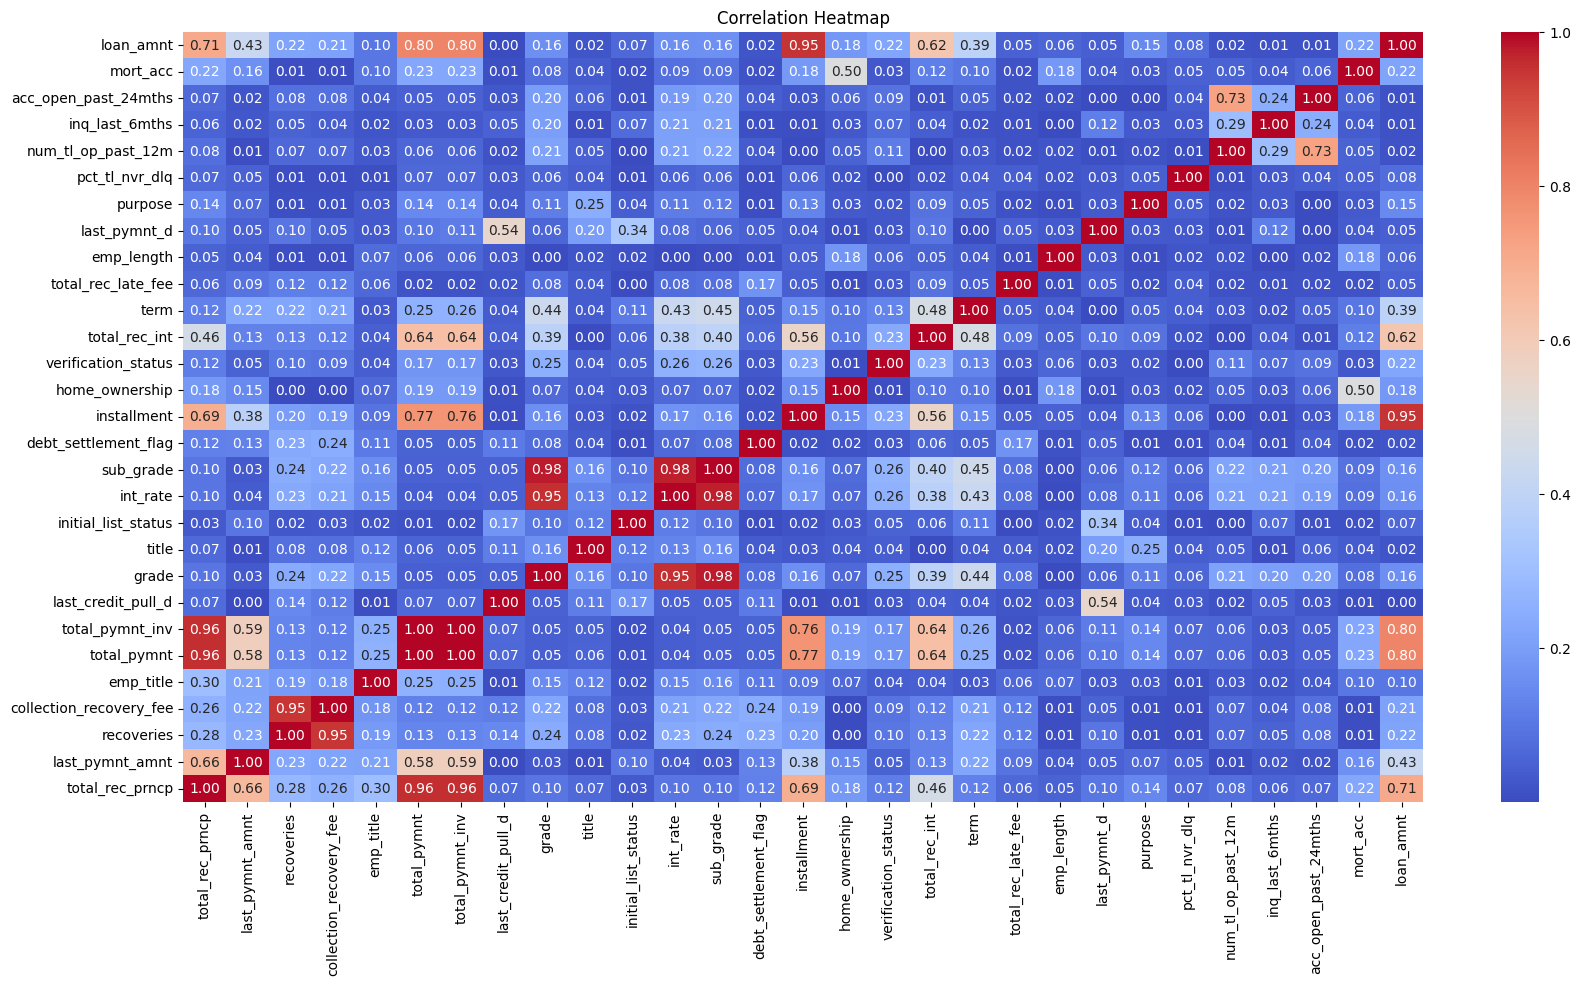

In [102]:
correlation_matrix = X_temp[selected_features].corr().abs()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.gca().invert_yaxis()
plt.show()

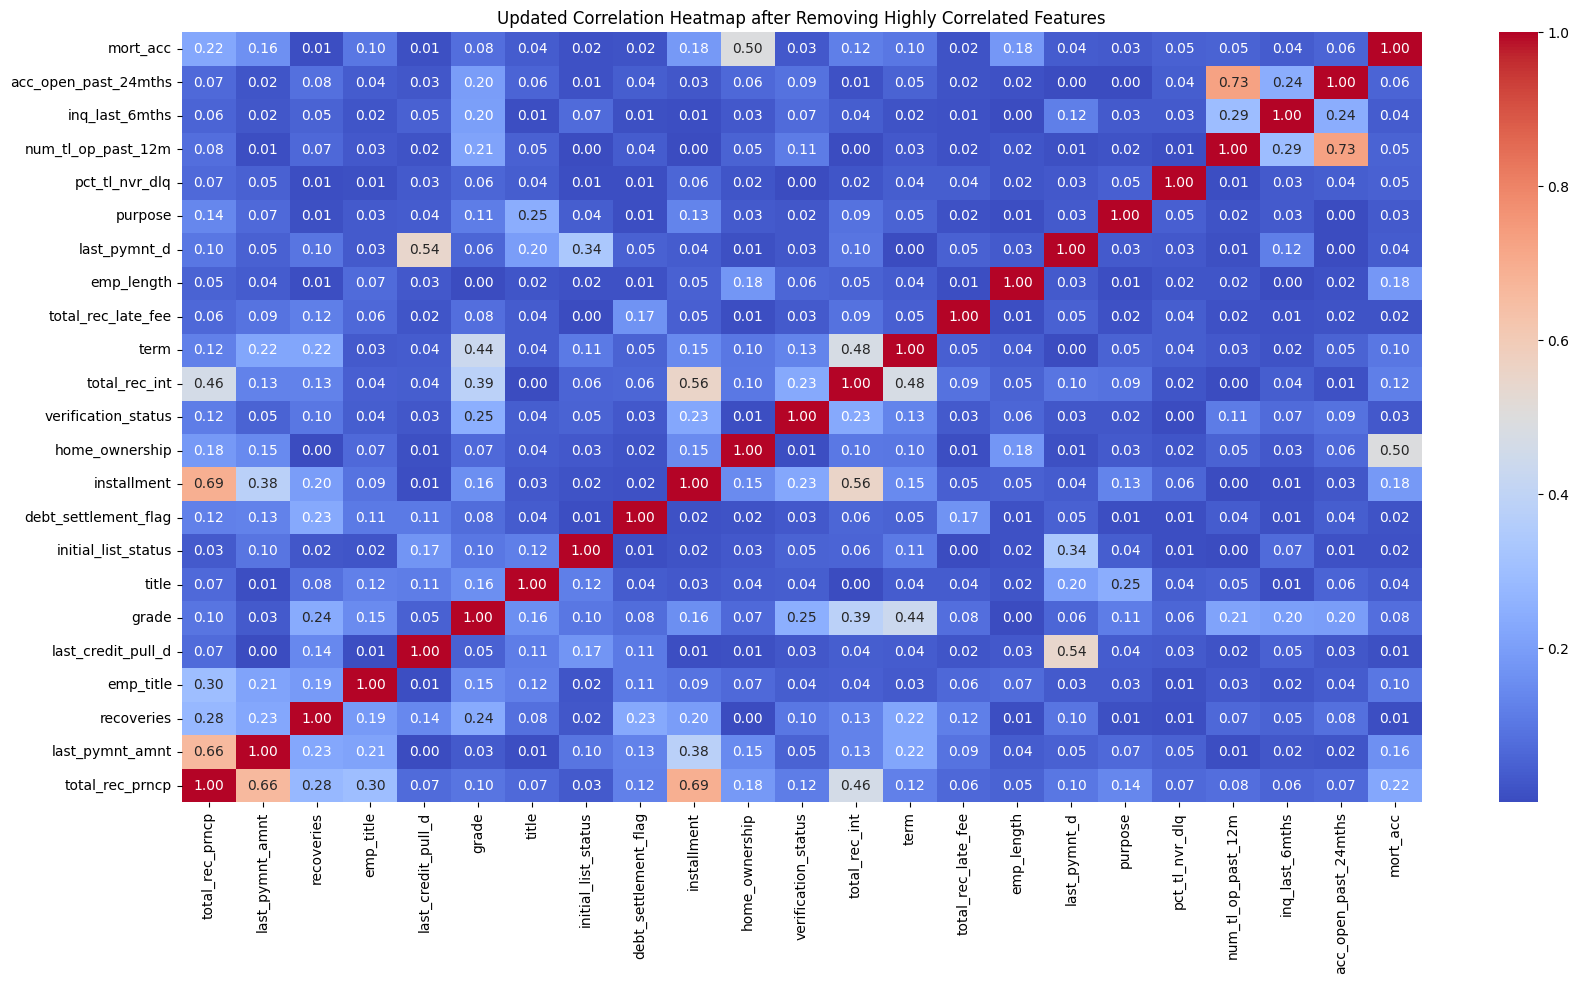

In [107]:
threshold_corr = 0.8

# Columns to remove
columns_to_remove = ['total_pymnt', 'total_pymnt_inv', 'loan_amnt', 'collection_recovery_fee', 'int_rate', 'sub_grade']

# Remove highly correlated features
for col in columns_to_remove:
    if col in selected_features:
        selected_features.remove(col)

correlation_matrix_filtered = X_temp[selected_features].corr().abs()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Updated Correlation Heatmap after Removing Highly Correlated Features')
plt.gca().invert_yaxis()
plt.show()

In [109]:
# Fimal selected features
print(f"No. of final selected features: {len(selected_features)}")
print(selected_features)

No. of final selected features: 23
['total_rec_prncp', 'last_pymnt_amnt', 'recoveries', 'emp_title', 'last_credit_pull_d', 'grade', 'title', 'initial_list_status', 'debt_settlement_flag', 'installment', 'home_ownership', 'verification_status', 'total_rec_int', 'term', 'total_rec_late_fee', 'emp_length', 'last_pymnt_d', 'purpose', 'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'inq_last_6mths', 'acc_open_past_24mths', 'mort_acc']


After applying feature selection techniques, we successfully reduced the dataset from 144 features to 23 features. The final selected features are as follows:

- 'total_rec_prncp'
- 'last_pymnt_amnt'
- 'recoveries'
- 'emp_title'
- 'last_credit_pull_d'
- 'grade'
- 'title'
- 'initial_list_status'
- 'debt_settlement_flag'
- 'installment'
- 'home_ownership'
- 'verification_status'
- 'total_rec_int'
- 'term'
- 'total_rec_late_fee'
- 'emp_length'
- 'last_pymnt_d'
- 'purpose'
- 'pct_tl_nvr_dlq'
- 'num_tl_op_past_12m'
- 'inq_last_6mths'
- 'acc_open_past_24mths'
- 'mort_acc'

Subsequently, we performed encoding for the selected features across all datasets including train, validation, and test sets to train the model. It's important to note that all transformations applied to the validation and test datasets were based on the transformations applied to the train dataset. This ensures consistency in the preprocessing steps and prevents data leakage, ultimately ensuring the model's reliability and generalizability. By encoding the selected features and applying consistent transformations across all datasets, we prepared the data for training the machine learning model, which will then be evaluated and tested for its predictive performance.

In [132]:
# Filter the data sets with the selected features
X_train = df_train[selected_features]
y_train = df_train['loan_status']

X_valid = df_valid[selected_features]
y_valid = df_valid['loan_status']

X_test = df_test[selected_features]

print(X_train.shape)
X_train.head()

(517788, 23)


,total_rec_prncp,last_pymnt_amnt,recoveries,emp_title,last_credit_pull_d,grade,title,initial_list_status,debt_settlement_flag,installment,...,term,total_rec_late_fee,emp_length,last_pymnt_d,purpose,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,acc_open_past_24mths,mort_acc
0,14000.0,8611.87,0.0,Paralegal,Dec-2018,A,Debt consolidation,f,N,434.53,...,36 months,0.0,1 year,Dec-2018,debt_consolidation,100.0,1.0,0.0,2.0,0.0
1,2000.0,70.18,0.0,NaN,Jul-2017,D,Debt consolidation,w,N,70.61,...,36 months,0.0,NaN,Jul-2017,debt_consolidation,93.7,4.0,0.0,6.0,0.0
2,5000.0,2662.94,0.0,owner,Oct-2017,A,Credit card refinancing,f,N,155.28,...,36 months,0.0,4 years,Oct-2017,credit_card,100.0,2.0,0.0,3.0,4.0
3,20600.0,683.96,0.0,NaN,Dec-2017,B,Debt consolidation,f,N,684.12,...,36 months,0.0,NaN,Jan-2018,debt_consolidation,91.2,0.0,0.0,1.0,2.0
4,10000.0,4753.53,0.0,Senior UX designer,Jul-2018,A,Credit card refinancing,w,N,310.56,...,36 months,0.0,< 1 year,Dec-2017,credit_card,97.0,1.0,0.0,1.0,0.0


In [133]:
threshold = 0.5
columns_to_drop = X_train.columns[X_train.isnull().mean() > threshold].tolist()
print(f"No. of columns to drop: {len(columns_to_drop)}")

No. of columns to drop: 0


In [134]:
X_train_temp = X_train.copy()
X_valid_temp = X_valid.copy()
X_test_temp = X_test.copy()

# Imput missing values in the columns
for col in X_train_temp.columns:
    if X_train_temp[col].dtype == 'object':
        mode_value = X_train_temp[col].mode()[0]
        X_train_temp[col] = X_train_temp[col].fillna(mode_value)
        X_valid_temp[col] = X_valid_temp[col].fillna(mode_value)
        X_test_temp[col] = X_test_temp[col].fillna(mode_value)
    else:
        mean_value = X_train_temp[col].mean()
        X_train_temp[col] = X_train_temp[col].fillna(mean_value)
        X_valid_temp[col] = X_valid_temp[col].fillna(mean_value)
        X_test_temp[col] = X_test_temp[col].fillna(mean_value)

X_train = X_train_temp
X_valid = X_valid_temp
X_test = X_test_temp

print(X_train.shape)
X_train.head()

(517788, 23)


,total_rec_prncp,last_pymnt_amnt,recoveries,emp_title,last_credit_pull_d,grade,title,initial_list_status,debt_settlement_flag,installment,...,term,total_rec_late_fee,emp_length,last_pymnt_d,purpose,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,acc_open_past_24mths,mort_acc
0,14000.0,8611.87,0.0,Paralegal,Dec-2018,A,Debt consolidation,f,N,434.53,...,36 months,0.0,1 year,Dec-2018,debt_consolidation,100.0,1.0,0.0,2.0,0.0
1,2000.0,70.18,0.0,Teacher,Jul-2017,D,Debt consolidation,w,N,70.61,...,36 months,0.0,10+ years,Jul-2017,debt_consolidation,93.7,4.0,0.0,6.0,0.0
2,5000.0,2662.94,0.0,owner,Oct-2017,A,Credit card refinancing,f,N,155.28,...,36 months,0.0,4 years,Oct-2017,credit_card,100.0,2.0,0.0,3.0,4.0
3,20600.0,683.96,0.0,Teacher,Dec-2017,B,Debt consolidation,f,N,684.12,...,36 months,0.0,10+ years,Jan-2018,debt_consolidation,91.2,0.0,0.0,1.0,2.0
4,10000.0,4753.53,0.0,Senior UX designer,Jul-2018,A,Credit card refinancing,w,N,310.56,...,36 months,0.0,< 1 year,Dec-2017,credit_card,97.0,1.0,0.0,1.0,0.0


In [135]:
# No. of missing values in each column of the filtered data set
print(X_train.isnull().sum())

total_rec_prncp         0
last_pymnt_amnt         0
recoveries              0
emp_title               0
last_credit_pull_d      0
grade                   0
title                   0
initial_list_status     0
debt_settlement_flag    0
installment             0
home_ownership          0
verification_status     0
total_rec_int           0
term                    0
total_rec_late_fee      0
emp_length              0
last_pymnt_d            0
purpose                 0
pct_tl_nvr_dlq          0
num_tl_op_past_12m      0
inq_last_6mths          0
acc_open_past_24mths    0
mort_acc                0
dtype: int64


In [136]:
X_train_temp = X_train.copy()
X_valid_temp = X_valid.copy()
X_test_temp = X_test.copy()

# Impute outliers in numerical columns
for col in X_train_temp.select_dtypes(include=np.number).columns:
    X_train_temp[col] = replace_outliers(X_train_temp[col])
    X_valid_temp[col] = replace_outliers(X_valid_temp[col])
    X_test_temp[col] = replace_outliers(X_test_temp[col])

X_train = X_train_temp
X_valid = X_valid_temp
X_test = X_test_temp

print(X_train.shape)
X_train.head()

(517788, 23)


,total_rec_prncp,last_pymnt_amnt,recoveries,emp_title,last_credit_pull_d,grade,title,initial_list_status,debt_settlement_flag,installment,...,term,total_rec_late_fee,emp_length,last_pymnt_d,purpose,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,acc_open_past_24mths,mort_acc
0,14000.0,8611.87,0.0,Paralegal,Dec-2018,A,Debt consolidation,f,N,434.53,...,36 months,0.0,1 year,Dec-2018,debt_consolidation,100.0,1.0,0.0,2.0,0.0
1,2000.0,70.18,0.0,Teacher,Jul-2017,D,Debt consolidation,w,N,70.61,...,36 months,0.0,10+ years,Jul-2017,debt_consolidation,93.7,4.0,0.0,6.0,0.0
2,5000.0,2662.94,0.0,owner,Oct-2017,A,Credit card refinancing,f,N,155.28,...,36 months,0.0,4 years,Oct-2017,credit_card,100.0,2.0,0.0,3.0,4.0
3,20600.0,683.96,0.0,Teacher,Dec-2017,B,Debt consolidation,f,N,684.12,...,36 months,0.0,10+ years,Jan-2018,debt_consolidation,91.2,0.0,0.0,1.0,2.0
4,10000.0,4753.53,0.0,Senior UX designer,Jul-2018,A,Credit card refinancing,w,N,310.56,...,36 months,0.0,< 1 year,Dec-2017,credit_card,97.0,1.0,0.0,1.0,0.0


In [137]:
# Categorical columns in the filtered data set
categorical_cols = X_train.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['emp_title', 'last_credit_pull_d', 'grade', 'title',
       'initial_list_status', 'debt_settlement_flag', 'home_ownership',
       'verification_status', 'term', 'emp_length', 'last_pymnt_d', 'purpose'],
      dtype='object')


In [138]:
print(f"No. of unique values before get to the lower case: {X_train['emp_title'].nunique()}")

X_train_temp = X_train.copy()
X_valid_temp = X_valid.copy()
X_test_temp = X_test.copy()

# Convert values of 'emp_title' column to lowercase
X_train_temp['emp_title'] = X_train_temp['emp_title'].str.lower()
X_valid_temp['emp_title'] = X_valid_temp['emp_title'].str.lower()
X_test_temp['emp_title'] = X_test_temp['emp_title'].str.lower()

X_train = X_train_temp
X_valid = X_valid_temp
X_test = X_test_temp

print(f"No. of unique values after got to the lower case: {X_train['emp_title'].nunique()}")

No. of unique values before get to the lower case: 175168
No. of unique values after got to the lower case: 152585


In [139]:
# Classification of categorical columns into ordinal and nominal
ordinal_cols = pd.Index(['term', 'grade', 'verification_status', 'initial_list_status', 'debt_settlement_flag'])
nominal_cols = pd.Index(['home_ownership', 'purpose'])

# Columns with date type values
date_cols = pd.Index(['last_pymnt_d', 'last_credit_pull_d'])

# Columns with many unique values
many_unique_cols = pd.Index(['emp_title', 'title'])

In [140]:
# Encode ordinal categorical values using the mapping dictionary
X_train['emp_length'] = X_train['emp_length'].map(ordinal_mapping)
X_valid['emp_length'] = X_valid['emp_length'].map(ordinal_mapping)
X_test['emp_length'] = X_test['emp_length'].map(ordinal_mapping)

In [141]:
# Ordinal encoding for ordinal columns
for col in ordinal_cols:
    X_train[col] = ordinal_encoder.fit_transform(X_train[[col]])
    X_valid[col] = ordinal_encoder.transform(X_valid[[col]])
    X_test[col] = ordinal_encoder.transform(X_test[[col]])

# Convert encoded values to integers
X_train[ordinal_cols] = X_train[ordinal_cols].astype(int)
X_valid[ordinal_cols] = X_valid[ordinal_cols].astype(int)
X_test[ordinal_cols] = X_test[ordinal_cols].astype(int)

print(X_train.shape)
X_train.head()

(517788, 23)


,total_rec_prncp,last_pymnt_amnt,recoveries,emp_title,last_credit_pull_d,grade,title,initial_list_status,debt_settlement_flag,installment,...,term,total_rec_late_fee,emp_length,last_pymnt_d,purpose,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,acc_open_past_24mths,mort_acc
0,14000.0,8611.87,0.0,paralegal,Dec-2018,0,Debt consolidation,0,0,434.53,...,0,0.0,1,Dec-2018,debt_consolidation,100.0,1.0,0.0,2.0,0.0
1,2000.0,70.18,0.0,teacher,Jul-2017,3,Debt consolidation,1,0,70.61,...,0,0.0,10,Jul-2017,debt_consolidation,93.7,4.0,0.0,6.0,0.0
2,5000.0,2662.94,0.0,owner,Oct-2017,0,Credit card refinancing,0,0,155.28,...,0,0.0,4,Oct-2017,credit_card,100.0,2.0,0.0,3.0,4.0
3,20600.0,683.96,0.0,teacher,Dec-2017,1,Debt consolidation,0,0,684.12,...,0,0.0,10,Jan-2018,debt_consolidation,91.2,0.0,0.0,1.0,2.0
4,10000.0,4753.53,0.0,senior ux designer,Jul-2018,0,Credit card refinancing,1,0,310.56,...,0,0.0,0,Dec-2017,credit_card,97.0,1.0,0.0,1.0,0.0


In [142]:
# Label encoding for nominal columns
for col in nominal_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_valid[col] = label_encoder.transform(X_valid[col])
    X_test[col] = label_encoder.transform(X_test[col])

print(X_train.shape)
X_train.head()

(517788, 23)


,total_rec_prncp,last_pymnt_amnt,recoveries,emp_title,last_credit_pull_d,grade,title,initial_list_status,debt_settlement_flag,installment,...,term,total_rec_late_fee,emp_length,last_pymnt_d,purpose,pct_tl_nvr_dlq,num_tl_op_past_12m,inq_last_6mths,acc_open_past_24mths,mort_acc
0,14000.0,8611.87,0.0,paralegal,Dec-2018,0,Debt consolidation,0,0,434.53,...,0,0.0,1,Dec-2018,2,100.0,1.0,0.0,2.0,0.0
1,2000.0,70.18,0.0,teacher,Jul-2017,3,Debt consolidation,1,0,70.61,...,0,0.0,10,Jul-2017,2,93.7,4.0,0.0,6.0,0.0
2,5000.0,2662.94,0.0,owner,Oct-2017,0,Credit card refinancing,0,0,155.28,...,0,0.0,4,Oct-2017,1,100.0,2.0,0.0,3.0,4.0
3,20600.0,683.96,0.0,teacher,Dec-2017,1,Debt consolidation,0,0,684.12,...,0,0.0,10,Jan-2018,2,91.2,0.0,0.0,1.0,2.0
4,10000.0,4753.53,0.0,senior ux designer,Jul-2018,0,Credit card refinancing,1,0,310.56,...,0,0.0,0,Dec-2017,1,97.0,1.0,0.0,1.0,0.0


In [143]:
print(X_train[date_cols].head())

# Set initial minimum date
min_date = pd.to_datetime('2024-01-01')

for col in date_cols:
    X_train[col] = pd.to_datetime(X_train[col], format='%b-%Y')
    X_valid[col] = pd.to_datetime(X_valid[col], format='%b-%Y')
    X_test[col] = pd.to_datetime(X_test[col], format='%b-%Y')
    
    if X_train[col].min() < min_date:
        min_date = X_train[col].min()

print(f"\nmin_date: {min_date}\n")

# Set timestamps for date columns
for col in date_cols:
    X_train[col] = (X_train[col] - min_date).dt.days.astype(int)
    X_valid[col] = (X_valid[col] - min_date).dt.days.astype(int)
    X_test[col] = (X_test[col] - min_date).dt.days.astype(int)

print(X_train[date_cols].head())

  last_pymnt_d last_credit_pull_d
0     Dec-2018           Dec-2018
1     Jul-2017           Jul-2017
2     Oct-2017           Oct-2017
3     Jan-2018           Dec-2017
4     Dec-2017           Jul-2018

min_date: 2007-05-01 00:00:00

   last_pymnt_d  last_credit_pull_d
0          4232                4232
1          3714                3714
2          3806                3806
3          3898                3867
4          3867                4079


In [144]:
print(X_train[many_unique_cols].head())
print()

# Perform target encoding on 'emp_title' and 'title' columns
X_train[many_unique_cols] = target_encoder.fit_transform(X_train[many_unique_cols], y_train)
X_valid[many_unique_cols] = target_encoder.transform(X_valid[many_unique_cols])
X_test[many_unique_cols] = target_encoder.transform(X_test[many_unique_cols])

print(X_train[many_unique_cols].head())

            emp_title                    title
0          paralegal        Debt consolidation
1             teacher       Debt consolidation
2               owner  Credit card refinancing
3             teacher       Debt consolidation
4  senior ux designer  Credit card refinancing

   emp_title     title
0   0.645924  0.669920
1   0.641054  0.669920
2   0.619686  0.729964
3   0.641054  0.669920
4   0.747733  0.729964


After preprocessing the data, I trained an XGBoost classifier model and performed hyperparameter tuning using cross-validation to enhance its accuracy. The hyperparameters I tuned were 'learning_rate', 'max_depth', and 'n_estimators'. 

- learning_rate: 0.3, 0.4, 0.5, 0.6
- max_depth: 2, 3, 4, 5
- n_estimators: 100, 200, 300, 400

The grid search resulted in finding the best model with the following hyperparameters:
- learning_rate: 0.5
- max_depth: 4
- n_estimators: 400

To validate the model's performance, I used the validation dataset and obtained an accuracy score of 0.99878. Based on this score, I concluded that the model is neither overfitted nor underfitted. An accuracy score close to 1 indicates that the model is performing well on unseen data and generalizing effectively to new instances.

Overall, the trained XGBoost classifier with the optimized hyperparameters demonstrated strong performance on the validation dataset, suggesting that it is adequately capturing the underlying patterns in the data without exhibiting significant signs of overfitting or underfitting.

In [145]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'learning_rate': [0.3, 0.4, 0.5, 0.6],
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [100, 200, 300, 400],
}

xgb_model = XGBClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_

train_accuracy = best_xgb_model.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the validation set
validation_accuracy = best_xgb_model.score(X_valid, y_valid)
print("Validation accuracy:", validation_accuracy)

Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 400}
Training accuracy: 0.9999942061229693
Validation accuracy: 0.9987832858235417


In [146]:
from sklearn.metrics import accuracy_score

y_valid_pred = best_xgb_model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_valid_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9987832858235417


In [147]:
# Save the predictions to a CSV file
predictions = best_xgb_model.predict(X_test)

results = pd.DataFrame({'loan_status': predictions})
combined_data = pd.concat([results, X_test], axis=1)
combined_data.to_csv('210173T.csv', index=False)